In [1]:
# Loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0,8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm


In [2]:
# loading data 

train = pd.read_csv("train_set.csv")
print(type(train))
test = pd.read_csv("test_set.csv")
print(type(test))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [3]:
# checking the head of train data set 

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Getting row and column information of the data sets

print('The train data set has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))

print('The test data set has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))


The train data set has 1460 rows and 81 columns
The test data set has 1459 rows and 80 columns


In [5]:
# Row and column can be checked with info() as well7
# Getting more information about the train data set

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# checking missing values from the train data set 

train.columns[train.isnull().any()]



Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
# Last command shows 19 out of 81 columns has missing valuess
# Counting the missing values

miss = train.isnull().sum()
miss


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [8]:
# Ratio of missing value and then sorting

miss = train.isnull().sum()/len(train)
print(type(miss))
miss = miss[miss>0]
miss.sort_values(inplace=True)
miss


<class 'pandas.core.series.Series'>


Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [9]:
# Printing the SalePrice from the train data set 

print(train['SalePrice'])

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [21]:
# visualising missing values 

miss = miss.to_frame() # converting missing values into a frame
miss.columns = ['Count']
miss.index.names = ['Name']
miss['Name'] = miss.index


# plotting the missing vlaues

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'Count', data = miss)
plt.xticks(rotation = 90) 
plt.show()


AttributeError: 'DataFrame' object has no attribute 'to_frame'

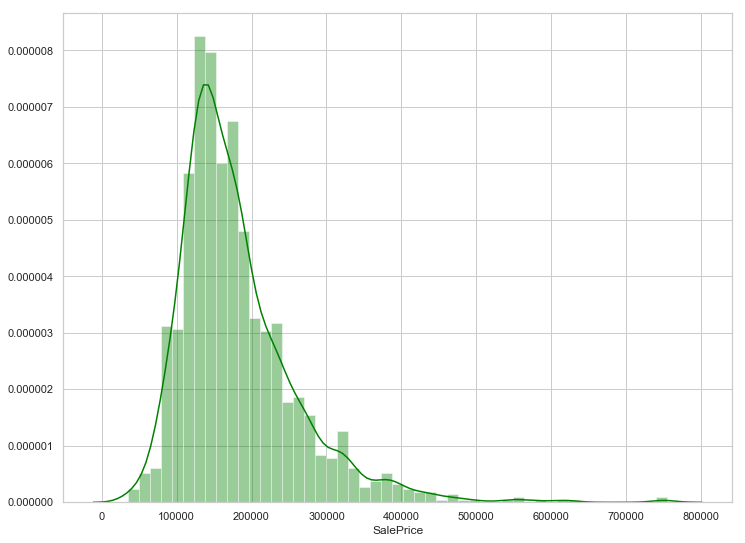

In [18]:
# checking the distribution of target variable - SalePrice

plt.figure(figsize=(12, 9))
sns.distplot(train['SalePrice'], color = "green")

In [12]:
'''
The distribution of sale price shows that the target variable SalePrice has a right-skewed distribution.
So, we to log transform this variable to make it closer to normal distribution
It will help in better modeling the relationship between target and independent variables.
'''

# Printing the skewness

print('The skewness of the sale price is: {0}'.format(train['SalePrice'].skew()))


The skewness of the sale price is: 1.8828757597682129


Skewness is: {} 0.12133506220520406


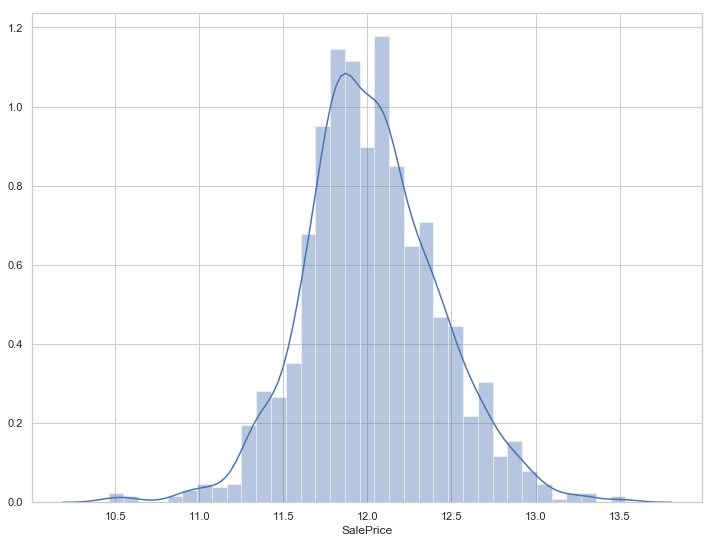

In [13]:
# Log transformation to make it normally distributed

target = np.log(train['SalePrice'])
print('Skewness is: {}', target.skew())
plt.figure(figsize=(12, 9))
sns.distplot(target)

In [14]:
# Separating numerical and categorical data

numerical_data = train.select_dtypes(include=[np.number])
categorical_data = train.select_dtypes(exclude=[np.number])

print('There are {0} numerical and {1} categorical data'.format(numerical_data.shape[1],categorical_data.shape[1]))

There are 38 numerical and 43 categorical data


In [15]:
# removing ID for numerical data 

del numerical_data['Id']


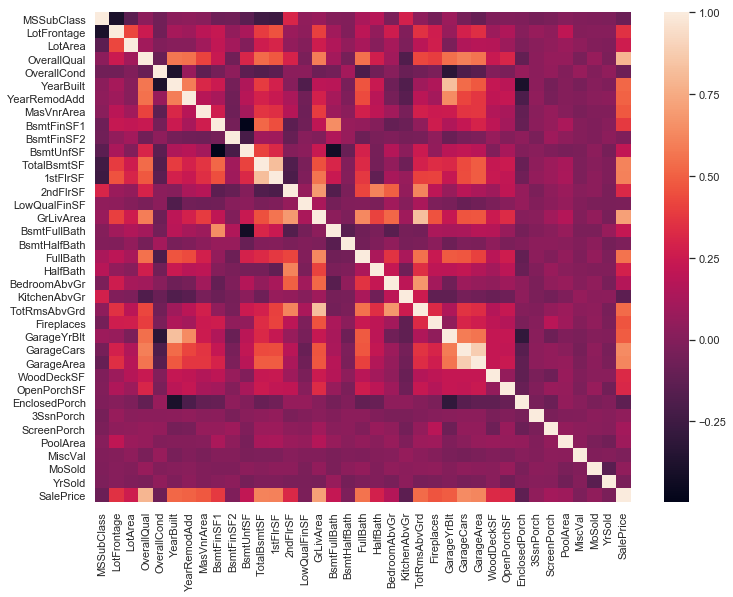

In [22]:
# Plotting the correlation of numeric variables/data

correlation = numerical_data.corr()

plt.figure(figsize=(12, 9))

sns.heatmap(correlation)

In [31]:
# Let's check the numeric correlation

print(correlation['SalePrice'].sort_values(ascending=False)[:15], '\n') # top 15 values
print(correlation['SalePrice'].sort_values(ascending=False)[-5:]) # last 5 values

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64
